In [ ]:
from google.colab import files
files.upload()

In [2]:
!pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge           COVID-19 Open Research Dataset Challenge (CORD-19)    3GB  2020-06-29 17:04:40          85439  
roche-data-science-coalition/uncover                        UNCOVER COVID-19 Challenge                          179MB  2020-05-21 18:57:53          14820  
mikahama/the-best-sarcasm-annotated-dataset-in-spanish      The Best Sarcasm Annotated Dataset in Spanish        26KB  2020-06-21 16:50:44             84  
shubh0799/churn-modelling                                   Churn Modelling                                     262KB  2020-06-20 17:33:28            735  
promptcloud/jobs-on-naukricom                               Jobs

In [3]:
!kaggle competitions download -c nyc-taxi-trip-duration

 78% 49.0M/62.9M [00:00<00:00, 39.8MB/s]
100% 62.9M/62.9M [00:00<00:00, 81.0MB/s]
 25% 5.00M/20.3M [00:00<00:00, 31.0MB/s]
100% 20.3M/20.3M [00:00<00:00, 80.7MB/s]
  0% 0.00/2.49M [00:00<?, ?B/s]
100% 2.49M/2.49M [00:00<00:00, 170MB/s]


In [4]:
!ls

kaggle.json  sample_data  sample_submission.zip  test.zip  train.zip


In [5]:
!unzip train.zip

Archive:  train.zip
  inflating: train.csv               


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
!ls

kaggle.json  sample_data  sample_submission.zip  test.zip  train.csv  train.zip


In [8]:

df = pd.read_csv('train.csv')

In [9]:
df.head()

id  vendor_id  ... store_and_fwd_flag trip_duration
0  id2875421          2  ...                  N           455
1  id2377394          1  ...                  N           663
2  id3858529          2  ...                  N          2124
3  id3504673          2  ...                  N           429
4  id2181028          2  ...                  N           435

[5 rows x 11 columns]

In [10]:
df.shape

(1458644, 11)

In [11]:
df.describe()

vendor_id  passenger_count  ...  dropoff_latitude  trip_duration
count  1.458644e+06     1.458644e+06  ...      1.458644e+06   1.458644e+06
mean   1.534950e+00     1.664530e+00  ...      4.075180e+01   9.594923e+02
std    4.987772e-01     1.314242e+00  ...      3.589056e-02   5.237432e+03
min    1.000000e+00     0.000000e+00  ...      3.218114e+01   1.000000e+00
25%    1.000000e+00     1.000000e+00  ...      4.073588e+01   3.970000e+02
50%    2.000000e+00     1.000000e+00  ...      4.075452e+01   6.620000e+02
75%    2.000000e+00     2.000000e+00  ...      4.076981e+01   1.075000e+03
max    2.000000e+00     9.000000e+00  ...      4.392103e+01   3.526282e+06

[8 rows x 7 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


No null values are present

In [13]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

Data fields
* id - a unique identifier for each trip
* vendor_id - a code indicating the provider associated with the trip record
* pickup_datetime - date and time when the meter was engaged
* dropoff_datetime - date and time when the meter was disengaged
* passenger_count - the number of passengers in the vehicle (driver entered value)
* pickup_longitude - the longitude where the meter was engaged
* pickup_latitude - the latitude where the meter was engaged
* dropoff_longitude - the longitude where the meter was disengaged
* dropoff_latitude - the latitude where the meter was disengaged
* store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* trip_duration - duration of the trip in seconds


trip_duration is our target class

In [14]:
print("The max trip duration is")
print((df['trip_duration'].max()),"seconds")
print((df['trip_duration'].max()/60),"mins")
print(df['trip_duration'].max()/60/60,"hrs")
print(df['trip_duration'].max()/60/60/24,"days")

The max trip duration is
3526282 seconds
58771.36666666667 mins
979.5227777777778 hrs
40.81344907407408 days


In [15]:
df['trip_duration'].quantile(q=0.99)

3440.0

In [16]:
df['trip_duration'].nlargest(10)

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
295382       86391
73816        86390
59891        86387
1360439      86385
753765       86379
Name: trip_duration, dtype: int64

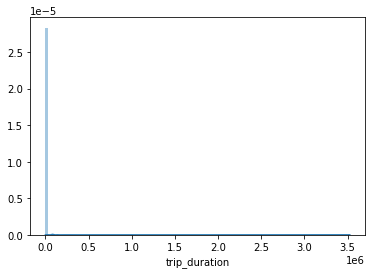

In [17]:
sns.distplot(df['trip_duration'],bins=100)

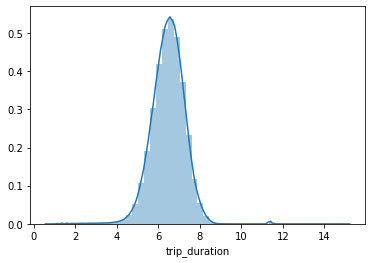

In [18]:
sns.distplot(np.log(df['trip_duration']+1))

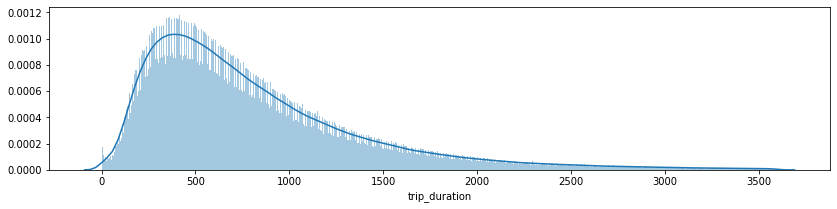

In [19]:
plt.figure(figsize=(14,3))
sns.distplot(df[df.trip_duration<3600]['trip_duration'],bins=1000)

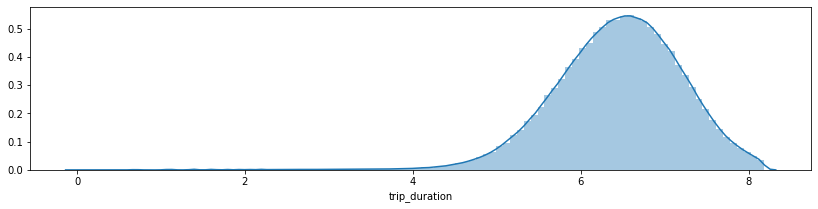

In [20]:
plt.figure(figsize=(14,3))
sns.distplot(np.log(df[df.trip_duration<3600]['trip_duration']),bins=100)

* The longest trip is of 40 days 
* 99 precentile of the durations are of less thann 3440 secs which is approx 57 mins
* We have only 4 trips more than 1939736 which is 22 days
* Other are below 22 hrs
* It is normal distribution

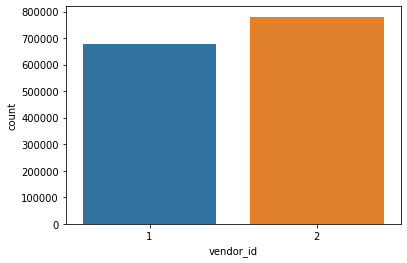

In [21]:
sns.countplot(df['vendor_id'])

In [22]:
df['vendor_id'].value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

In [23]:
df['dropoff_date'] = df['dropoff_datetime'].apply(lambda x:x.split(" ")[0])

In [24]:
df.head()

id  vendor_id  ... trip_duration dropoff_date
0  id2875421          2  ...           455   2016-03-14
1  id2377394          1  ...           663   2016-06-12
2  id3858529          2  ...          2124   2016-01-19
3  id3504673          2  ...           429   2016-04-06
4  id2181028          2  ...           435   2016-03-26

[5 rows x 12 columns]

In [25]:
from datetime import datetime
datetime_object = datetime.strptime('2016-03-26 13:30:55', '%Y-%m-%d %H:%M:%S')
print(datetime_object)

2016-03-26 13:30:55


In [26]:
df['dropoff_datetime_format'] = df['dropoff_datetime'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
df['pickup_datetime_format'] = df['pickup_datetime'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [27]:
df.dtypes

id                                 object
vendor_id                           int64
pickup_datetime                    object
dropoff_datetime                   object
passenger_count                     int64
pickup_longitude                  float64
pickup_latitude                   float64
dropoff_longitude                 float64
dropoff_latitude                  float64
store_and_fwd_flag                 object
trip_duration                       int64
dropoff_date                       object
dropoff_datetime_format    datetime64[ns]
pickup_datetime_format     datetime64[ns]
dtype: object

In [28]:
#date time Range
print("Pick up")
print("Start",df['pickup_datetime_format'].min())
print("End",df['pickup_datetime_format'].max())

print("Drop off")
print("Start",df['dropoff_datetime_format'].min())
print("End",df['dropoff_datetime_format'].max())

Pick up
Start 2016-01-01 00:00:17
End 2016-06-30 23:59:39
Drop off
Start 2016-01-01 00:03:31
End 2016-07-01 23:02:03


* We have data of 6 months 
* 2016/01/01 to 2016/06/30

In [29]:
(df.groupby(df["pickup_datetime_format"].dt.month).count()['id'])

pickup_datetime_format
1    229707
2    238300
3    256189
4    251645
5    248487
6    234316
Name: id, dtype: int64

pickup_datetime_format
1    229707
2    238300
3    256189
4    251645
5    248487
6    234316
Name: id, dtype: int64

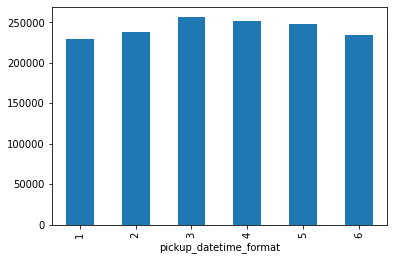

In [30]:
df.groupby(df["pickup_datetime_format"].dt.month).count()['id'].plot(kind="bar")
df.groupby(df["pickup_datetime_format"].dt.month).count()['id']

pickup_datetime_format
1     46612
2     47752
3     47945
4     49655
5     50176
6     49476
7     48671
8     48248
9     49634
10    48867
11    48864
12    50080
13    49293
14    50488
15    49791
16    51027
17    48968
18    47925
19    49265
20    49198
21    48306
22    47254
23    41450
24    43876
25    46450
26    47595
27    46957
28    45891
29    46807
30    39135
31    22988
Name: id, dtype: int64

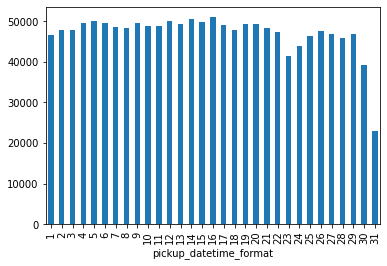

In [31]:
df.groupby(df["pickup_datetime_format"].dt.day).count()['id'].plot(kind="bar")
df.groupby(df["pickup_datetime_format"].dt.day).count()['id']

pickup_datetime_format
0     53248
1     38571
2     27972
3     20895
4     15792
5     15002
6     33248
7     55600
8     67053
9     67663
10    65437
11    68476
12    71873
13    71473
14    74292
15    71811
16    64313
17    76483
18    90600
19    90308
20    84072
21    84185
22    80492
23    69785
Name: id, dtype: int64

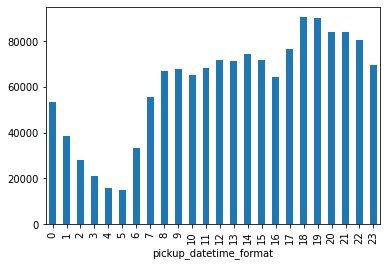

In [32]:
df.groupby(df["pickup_datetime_format"].dt.hour).count()['id'].plot(kind="bar")
df.groupby(df["pickup_datetime_format"].dt.hour).count()['id']

pickup_datetime_format
0    187418
1    202749
2    210136
3    218574
4    223533
5    220868
6    195366
Name: id, dtype: int64

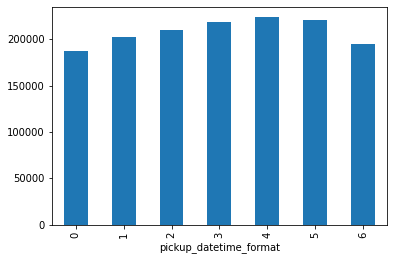

In [33]:
df.groupby(df["pickup_datetime_format"].dt.weekday).count()['id'].plot(kind="bar")
df.groupby(df["pickup_datetime_format"].dt.weekday).count()['id']

From date time plots :
* Most rides were in March and least in Jan
* First 15 days of the have more rides
* 31st has least rides because not all the months have 31 days
* Most rides are between 17 hrs to 22 hrs
* Least rides are between 1hrs to 6 hrs
* Sundays have least no of rides and Thursdays have more number of rides

In [34]:
max_pickups = df.groupby([df["pickup_datetime_format"].dt.day,df['pickup_datetime_format'].dt.month]).count()['id']

In [35]:
print(max_pickups.max())
print(max_pickups.min())

9796
1648


In [36]:
df.groupby(df["pickup_datetime_format"].dt.date).count()['id']

pickup_datetime_format
2016-01-01    7162
2016-01-02    6512
2016-01-03    6353
2016-01-04    6725
2016-01-05    7204
              ... 
2016-06-26    7084
2016-06-27    7311
2016-06-28    7253
2016-06-29    7623
2016-06-30    7588
Name: id, Length: 182, dtype: int64

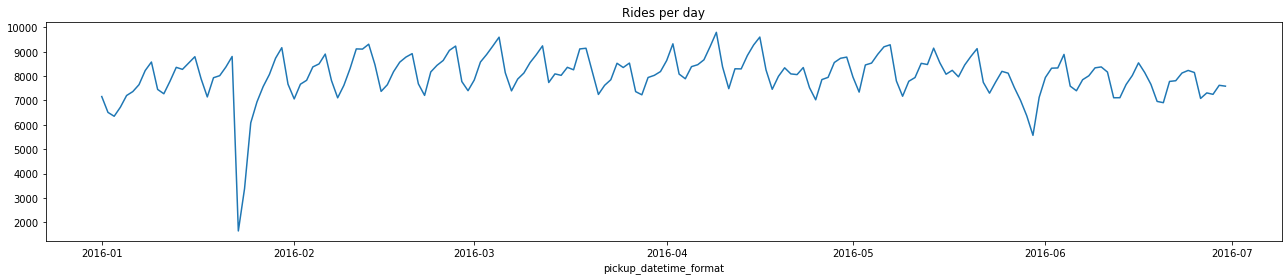

In [37]:
plt.figure(figsize=(18,4))
df.groupby(df["pickup_datetime_format"].dt.date).count()['id'].plot()
plt.title('Rides per day')
plt.tight_layout()

* The reason for the dip from 22 Jan to 24 Jan may be because of January 2016 United States blizzard (https://en.wikipedia.org/wiki/January_2016_United_States_blizzard)
* Other than that we can see the pattern of less rides during the end of the month
* the reson for dip on 30 May may be because of memorial day


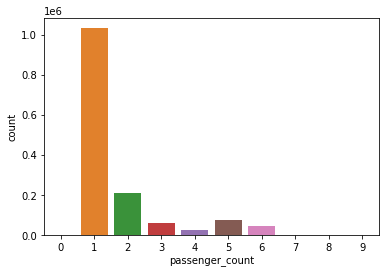

In [38]:
sns.countplot(df['passenger_count'])

In [94]:
avg_trip_duration_week_day = []
lst= []
for i in range(7):
  target_rows = df[df['pickup_datetime_format'].dt.weekday==i]
  avg_trip_duration_week_day.append(target_rows['trip_duration'].mean())
  lst.append(i)
plt.bar(lst,avg_trip_duration_week_day)
print(avg_trip_duration_week_day)

[897.94783852138, 983.4631243557304, 975.4504939658126, 1006.5286539112611, 990.2241995589018, 948.05117536266, 901.6393947769827]


Text(0, 0.5, 'duration')

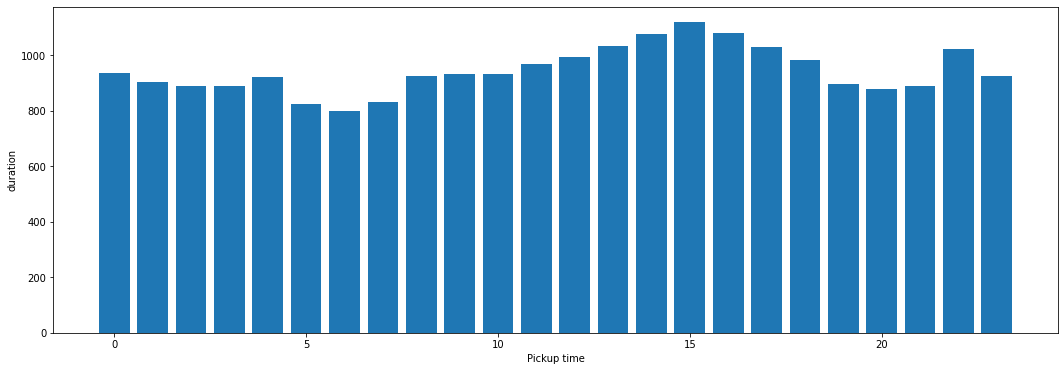

In [107]:
plt.figure(figsize=(18,6))
avg_trip_duration_hour = []
lst= []
for i in range(24):
  target_rows = df[df['pickup_datetime_format'].dt.hour==i]
  avg_trip_duration_hour.append(target_rows['trip_duration'].mean())
  lst.append(i)
plt.bar([i for i in range(len(avg_trip_duration_hour))],avg_trip_duration_hour)
plt.xlabel("Pickup time")
plt.ylabel('duration')

Text(0, 0.5, 'duration')

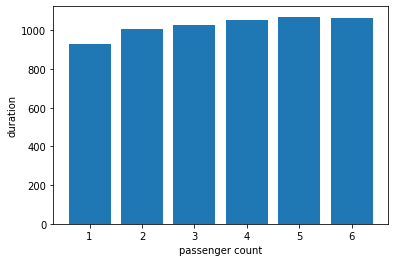

In [113]:
avg_trip_duration_passenger = []
lst= []
for i in range(1,7):
  target_rows = df[df['passenger_count']==i]
  avg_trip_duration_passenger.append(target_rows['trip_duration'].mean())
  lst.append(i)
plt.bar(lst,avg_trip_duration_passenger)
plt.xlabel("passenger count")
plt.ylabel('duration')

* Most trips have 1 passenger
* people prefer rides more then 15 mins between 2pm to 4pm
* long rides have more passenger

In [39]:
sns.scatterplot(y=df[df['pickup_latitude']<=41.5][df['pickup_latitude']>=39]['pickup_latitude'],x=df[df['pickup_longitude']>-75][df['pickup_longitude']<=-72.5]['pickup_longitude'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [40]:

max_lat = max(df.pickup_latitude.max(),df.dropoff_latitude.max())
min_lat = min(df.pickup_latitude.min(),df.dropoff_latitude.min())
max_long = max(df.pickup_longitude.max(), df.dropoff_longitude.max())
min_long = min(df.pickup_longitude.min(), df.dropoff_longitude.min())

#minimum and maximum latitude
print("max_lat :",max_lat)
print("min_lat :",min_lat)

# minimum and maximum longitude test set
print("max_long :",max_long)
print("min_long :",min_long)

max_lat : 51.88108444213867
min_lat : 32.1811408996582
max_long : -61.33552932739258
min_long : -121.93334197998048


In [41]:
BBox = (min_long,   max_long,      
         min_lat,max_lat)

In [42]:
BBox

(-121.93334197998048, -61.33552932739258, 32.1811408996582, 51.88108444213867)

In [45]:
import folium

In [53]:
def get_location_points(target_rows,color,type):
    map = folium.Map(location=[40.767937,-73.982155 ],tiles='cartodbdark_matter',
    zoom_start=12)
    for each in target_rows.iterrows():
        folium.CircleMarker([each[1][type+'_latitude'],each[1][type+'_longitude']],
                            radius=1,
                            color=color,
                            popup=str(each[1][type+'_latitude'])+','+str(each[1][type+'_longitude'])
                            ).add_to(map)
    return map

First 100 pick up locations

In [114]:
target_rows = df[0:500]
get_location_points(target_rows,color='gold',type = 'pickup')

first 100 drop locations

In [55]:
target_rows = df[0:500]
get_location_points(target_rows,color='silver',type='dropoff')

Most Common pickup locations from 0 to 6 o'clock

In [57]:
target_rows = df[df['pickup_datetime_format'].dt.hour<=6][df['pickup_datetime_format'].dt.hour>=0]
get_location_points(target_rows[0:500],color='gold',type = 'pickup')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Most common drop locations from 0 to 6'oclock

In [58]:
target_rows = df[df['pickup_datetime_format'].dt.hour<=6][df['pickup_datetime_format'].dt.hour>=0]
get_location_points(target_rows[0:500],color='silver',type = 'dropoff')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Most common pickup locations from 8 to 19 o'clock

In [59]:
target_rows = df[df['pickup_datetime_format'].dt.hour<=19][df['pickup_datetime_format'].dt.hour>=8]
get_location_points(target_rows[0:500],color='gold',type = 'pickup')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Most common drop locations from 8 to 19 o'clock

In [60]:
target_rows = df[df['pickup_datetime_format'].dt.hour<=19][df['pickup_datetime_format'].dt.hour>=8]
get_location_points(target_rows[0:500],color='silver',type = 'dropoff')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Most common pickup locations during weekends

In [61]:
target_rows = df[df['pickup_datetime_format'].dt.weekday<4][df['pickup_datetime_format'].dt.weekday<7]
get_location_points(target_rows[0:500],color='gold',type = 'pickup')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Most common drop locations during weekdays

In [115]:
target_rows = df[df['pickup_datetime_format'].dt.weekday<=5][df['pickup_datetime_format'].dt.weekday>=0]
get_location_points(target_rows[0:500],color='red',type = 'dropoff')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


* Week days and weekends have mostly same pattern
* We can see few trips between 0 to 6o'clock 

In [74]:
def convert(seconds):
    days = seconds//(24*60*60 )
    seconds = seconds % (24 * 3600) 
    hour = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
    
      
    return "%d days %d:%02d:%02d" % (days, hour, minutes, seconds)
convert(3526282) 

'40 days 19:31:22'

In [72]:
## Rides with maximum and minimum duration
def get_trip(target_rows):
    m = folium.Map([40.767937,-73.982155 ], zoom_start=12,tiles='cartodbdark_matter')
    for _, row in target_rows.iterrows():
        folium.CircleMarker([row['pickup_latitude'], row['pickup_longitude']],
                            radius=5,
                            fill_color="gold", # divvy color
                          ).add_to(m)

        folium.CircleMarker([row['dropoff_latitude'], row['dropoff_longitude']],
                            radius=5,
                            fill_color="silver", # divvy color
                          ).add_to(m)

        folium.PolyLine([[row['pickup_latitude'], row['pickup_longitude']], 
                        [row['dropoff_latitude'], row['dropoff_longitude']]]).add_child(folium.Tooltip("Duration of the trip:"+str(convert(row['trip_duration'])))).add_to(m)
    return m

Most longest and shortest duration trips

Hover over lines to get the duration

In [73]:
target_rows = df
#target_rows = df[df['pickup_datetime_format'].dt.hour<11][df['pickup_datetime_format'].dt.hour>8]
target_rows = target_rows[(target_rows['trip_duration']==target_rows['trip_duration'].max()) | (target_rows['trip_duration']==target_rows['trip_duration'].min())]
get_trip(target_rows)

Hover over the lines to get the trip duration
in format of hh:mm:ss

In [77]:
get_trip(df[0:50])

In [84]:
print(df['trip_duration'].mean())
target_rows = df[df['pickup_datetime_format'].dt.hour<=6][df['pickup_datetime_format'].dt.hour>=1]
print(target_rows['trip_duration'].mean())
get_trip(target_rows[0:50])

959.4922729603659
869.6681674148402


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
